In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
v1 = np.array([2, 3])
v2 = np.array([-3, 2])
v3 = np.array([1, 5])
v4 = np.array([-1, -3])
X = np.array([v1, v2, v3, v4])
origin = np.array([np.zeros(len(X)), np.zeros(len(X))])
print(origin)
print(*origin)
print(X)
print(*X)
print(len(X))
print(*origin, X[:, 0], X[:, 1])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0. 0.] [0. 0. 0. 0.]
[[ 2  3]
 [-3  2]
 [ 1  5]
 [-1 -3]]
[2 3] [-3  2] [1 5] [-1 -3]
4
[0. 0. 0. 0.] [0. 0. 0. 0.] [ 2 -3  1 -1] [ 3  2  5 -3]


In [3]:
def plotVectors(X):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('Vectors in standard positions')
  origin = np.array([np.zeros(len(X)), np.zeros(len(X))]) # origin point
  colors = cm.rainbow(np.linspace(0, 1, len(X))) # colors for vectors  
  plt.axvline(0)
  plt.axhline(0)
  ax.quiver(*origin, X[:,0], X[:,1], color = colors,
            angles = 'xy', scale_units ='xy', scale = 1)
  axlim = np.max([np.max(abs(X[:,0])),np.max(abs(X[:,1]))])
  ax.axis('equal')
  ax.set_xlim([-axlim-5, axlim+5])
  ax.set_ylim([-axlim-5, axlim+5])
  ax.set_xticks(np.arange(-axlim-5, axlim+5+1, step = np.round(axlim/2)))
  ax.set_yticks(np.arange(-axlim-5, axlim+5+1, step = np.round(axlim/2)))

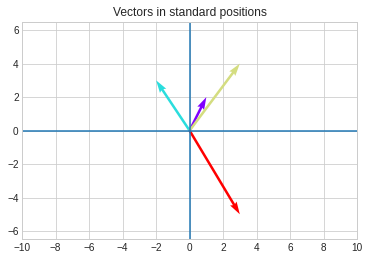

In [4]:
v1 = np.array([1, 2])
v2 = np.array([-2, 3])
v3 = np.array([3, 4])
v4 = np.array([3, -5])
plotVectors(np.array([v1, v2, v3, v4]))

In [5]:
# Print the entire dataframe
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [6]:
# Simulate a patient dataset
np.random.seed(100)
nsamples = 10
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                   'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df)

   Heart Rate (BPM)  Blood Pressure (mm Hg)
0              67.0                   122.0
1              75.0                   129.0
2              79.0                   121.0
3              73.0                   133.0
4              78.0                   131.0
5              76.0                   125.0
6              75.0                   122.0
7              70.0                   134.0
8              73.0                   122.0
9              75.0                   117.0


array([[ 1.        , -0.12702875],
       [-0.12702875,  1.        ]])

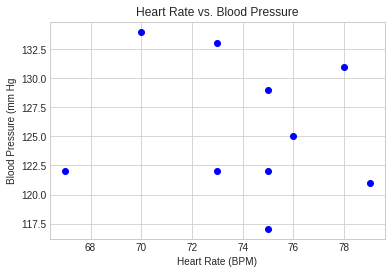

In [7]:
# How are the heart rate and blood pressure values related?
# Scatter plot between heart rate (BPM) and blood pressure (mm Hg)
a = df['Heart Rate (BPM)']
b = df['Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])
np.corrcoef(a, b)

In [8]:
# Add de-meaned features to the dataframe
df['Heart Rate De-meaned (BPM)'] = a - np.mean(a)
df['Blood Pressure De-meaned (mm Hg)'] = b - np.mean(b)
print(df)

   Heart Rate (BPM)  Blood Pressure (mm Hg)  Heart Rate De-meaned (BPM)  \
0              67.0                   122.0                        -7.1   
1              75.0                   129.0                         0.9   
2              79.0                   121.0                         4.9   
3              73.0                   133.0                        -1.1   
4              78.0                   131.0                         3.9   
5              76.0                   125.0                         1.9   
6              75.0                   122.0                         0.9   
7              70.0                   134.0                        -4.1   
8              73.0                   122.0                        -1.1   
9              75.0                   117.0                         0.9   

   Blood Pressure De-meaned (mm Hg)  
0                              -3.6  
1                               3.4  
2                              -4.6  
3                     

array([[ 1.        , -0.12702875],
       [-0.12702875,  1.        ]])

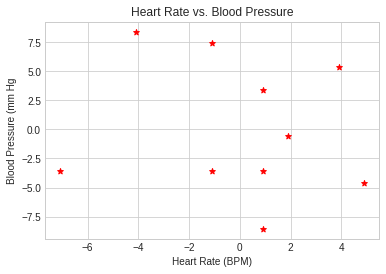

In [ ]:
# Scatter plot between de-meaned heart rate (BPM) and blood pressure (mm Hg)
a_dm = df['Heart Rate De-meaned (BPM)']
b_dm = df['Blood Pressure De-meaned (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a_dm, b_dm, marker = '*', color = 'red')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
np.corrcoef(a, b)

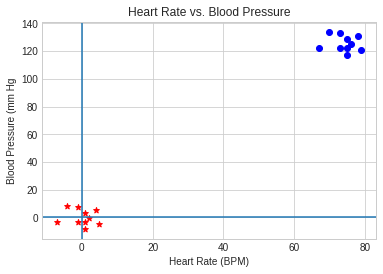

In [ ]:
# Scatter plot between de-meaned heart rate (BPM) and blood pressure (mm Hg)
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.scatter(a_dm, b_dm, marker = '*', color = 'red')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
plt.axvline(0)
plt.axhline(0)

In [12]:
stdev = lambda x: np.linalg.norm(x - np.mean(x)) / np.sqrt(len(x))

In [ ]:
stdev(a)

4.56508488420533

In [29]:
def plotveccomp(x, name = None, axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black', marker = 'o') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Patient #', fontsize = 16)
  ax.set_ylabel(name, fontsize = 16)
  ax.set_title(' '.join(name.split()[0:2]) +  ' Vector', fontsize = 14)

In [30]:
name = 'Heart Rate (BPM)'
' '.join(name.split()[0:2]) + ' Vector'

'Heart Rate Vector'

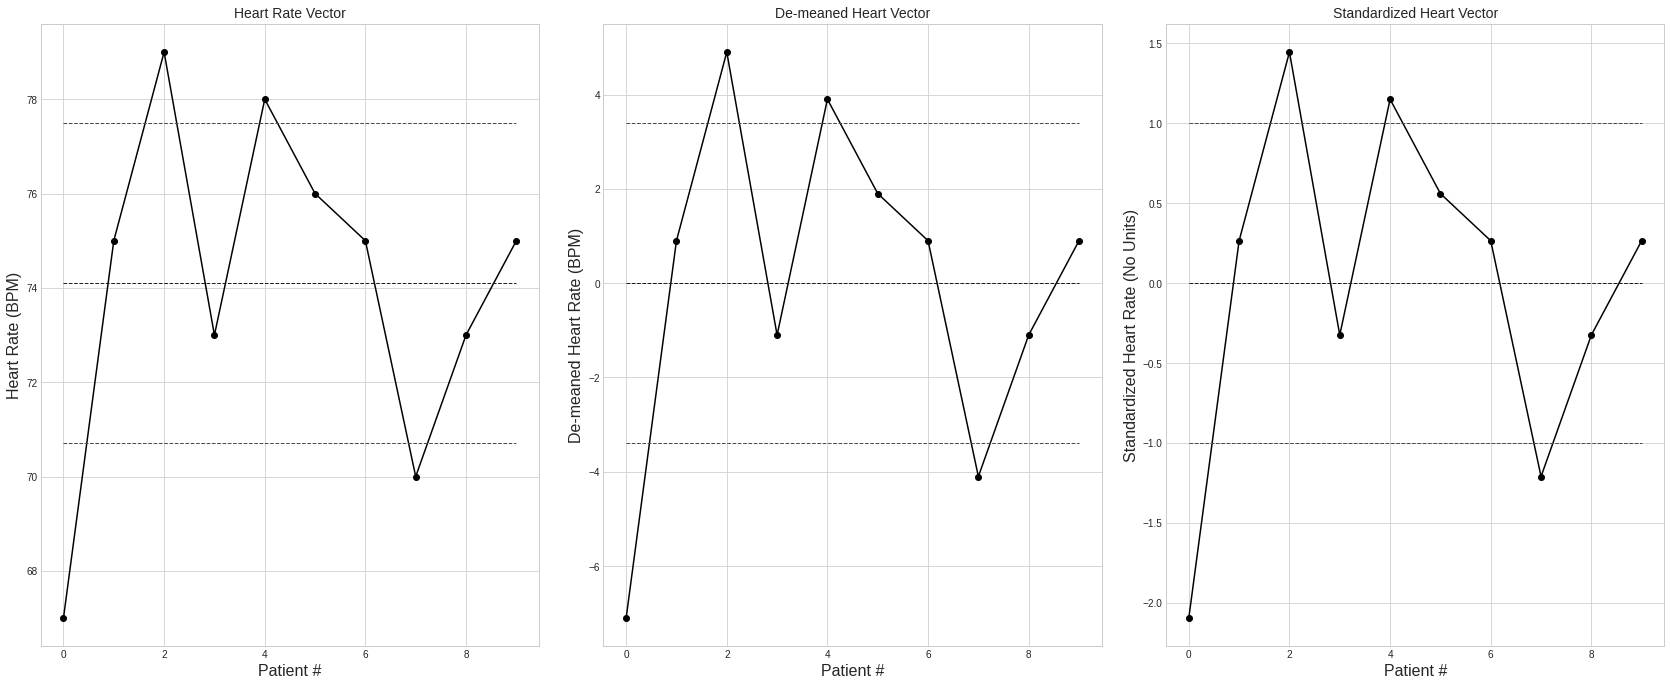

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24,10))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', ax1)
plotveccomp(a - np.mean(a), 'De-meaned Heart Rate (BPM)', ax2)
plotveccomp((a - np.mean(a))/stdev(a), 'Standardized Heart Rate (No Units)', ax3)
plt.savefig('stdofvec.png')

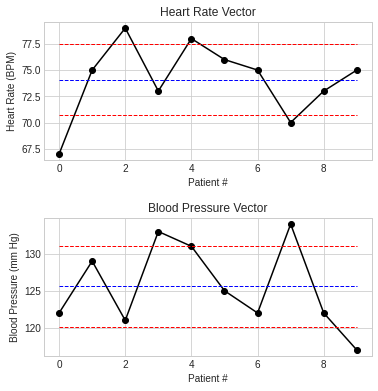

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', ax1)
plotveccomp(b, 'Blood Pressure (mm Hg)', ax2)

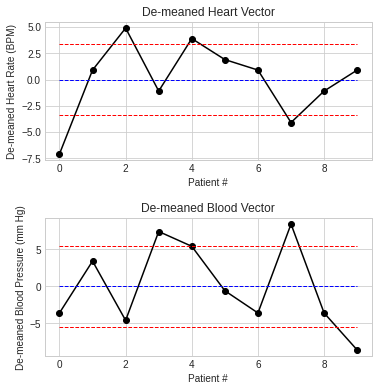

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a_dm, 'De-meaned Heart Rate (BPM)', ax1)
plotveccomp(b_dm, 'De-meaned Blood Pressure (mm Hg)', ax2)

In [ ]:
print(a)
print(a_dm)

0    67.0
1    75.0
2    79.0
3    73.0
4    78.0
5    76.0
6    75.0
7    70.0
8    73.0
9    75.0
Name: Heart Rate (BPM), dtype: float64
0   -7.1
1    0.9
2    4.9
3   -1.1
4    3.9
5    1.9
6    0.9
7   -4.1
8   -1.1
9    0.9
Name: Heart Rate De-meaned (BPM), dtype: float64


In [ ]:
print(np.dot(a, b)) # Dot-product between the original vectors do not reveal much
print(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))) # Recall angle(a,b) acos(aT*b/(||a||*||b||))
print(np.dot(a_dm, b_dm) / (np.linalg.norm(a_dm) * np.linalg.norm(b_dm))) # Correlation coefficient

93046.0
0.9977525107053088
-0.12702874998089897


In [ ]:
def plotvector(x, name = None, axis = None):
  ax = axis or plt.gca()
  component_index = range(0,len(a)) 
  ax.plot(component_index, x, color = 'blue', marker = 'o')
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'red')
  ax.plot(component_index, [np.mean(x) - stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.plot(component_index, [np.mean(x) + stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.set_xticks(np.arange(0, np.max(component_index), step = 2))
  ax.set_ylabel('Return') 
  ax.set_xlabel('Year #') 
  ax.set_title(name)

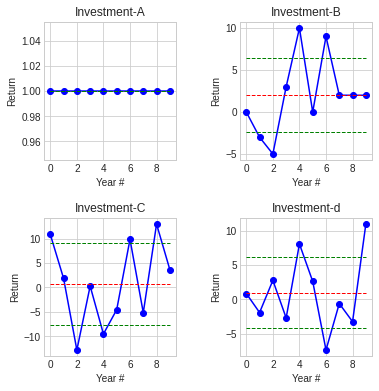

In [ ]:
# Generate four return vectors
nsamples = 10
a = np.round(np.random.normal(1, 0, nsamples))
b = np.round(np.random.normal(2, 4, nsamples))
c = np.round(np.random.normal(2, 4, nsamples)) + np.random.uniform(-10, 10, nsamples)
d = np.round(np.random.normal(2, 4, nsamples)) - np.random.uniform(-3, 3, nsamples)
fig, axes = plt.subplots(2, 2, figsize = (6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.tight_layout(pad = 4.0)
plotvector(a, 'Investment-A', ax1) 
plotvector(b, 'Investment-B', ax2)
plotvector(c, 'Investment-C', ax3)
plotvector(d, 'Investment-d', ax4)
# Plot a graph with risk on mean return on x-axis and standard deviation on the y-axis for the 4 types of investment